In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                "acceleration", "model year", "origin", "car name"]
df = pd.read_csv(url, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

# ---------------------------------Normalização do Dados--------------------------------
# Identificar colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('mpg')  # Remover a variável alvo

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDataFrame após normalização:")
print(df[numeric_columns].describe())



DataFrame após normalização:
          cylinders  displacement    horsepower        weight  acceleration  \
count  3.980000e+02  3.980000e+02  3.920000e+02  3.980000e+02  3.980000e+02   
mean  -3.570567e-17 -1.785283e-17 -1.812609e-16 -1.606755e-16 -2.677925e-16   
std    1.001259e+00  1.001259e+00  1.001278e+00  1.001259e+00  1.001259e+00   
min   -1.444949e+00 -1.204411e+00 -1.520975e+00 -1.604943e+00 -2.747814e+00   
25%   -8.563206e-01 -8.563178e-01 -7.665929e-01 -8.828266e-01 -6.328794e-01   
50%   -8.563206e-01 -4.314040e-01 -2.853488e-01 -1.973624e-01 -2.472221e-02   
75%    1.498191e+00  6.584879e-01  5.600800e-01  7.538337e-01  5.834349e-01   
max    1.498191e+00  2.511784e+00  3.265452e+00  2.565185e+00  3.351912e+00   

         model year        origin  car name  
count  3.980000e+02  3.980000e+02       0.0  
mean  -1.642461e-15 -5.355850e-17       NaN  
std    1.001259e+00  1.001259e+00       NaN  
min   -1.627426e+00 -7.151448e-01       NaN  
25%   -8.150739e-01 -7.15144

c:\Users\eduya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\eduya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\eduya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [32]:
# ------------------------------------Manipulação de Dados--------------------------------

print("Primeiras linhas do DataFrame original:")
print(df.head())
# print("\nInformações do DataFrame:")
# print(df.info())

# Remover a coluna 'car name' que não é relevante para a regressão
df = df.drop('car name', axis=1)

# Converter 'origin' para categórica
df['origin'] = df['origin'].astype('category')

# Tratar valores ausentes
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()
print("\nPrimeiras linhas do DataFrame após limpeza:")
print(df.head())

Primeiras linhas do DataFrame original:
    mpg  cylinders  displacement  horsepower    weight  acceleration  \
0  18.0   1.498191      1.090604    0.664133  0.630870     -1.295498   
1  15.0   1.498191      1.503514    1.574594  0.854333     -1.477038   
2  18.0   1.498191      1.196232    1.184397  0.550470     -1.658577   
3  16.0   1.498191      1.061796    1.184397  0.546923     -1.295498   
4  17.0   1.498191      1.042591    0.924265  0.565841     -1.840117   

   model year    origin  car name  
0   -1.627426 -0.715145       NaN  
1   -1.627426 -0.715145       NaN  
2   -1.627426 -0.715145       NaN  
3   -1.627426 -0.715145       NaN  
4   -1.627426 -0.715145       NaN  

Primeiras linhas do DataFrame após limpeza:
    mpg  cylinders  displacement  horsepower    weight  acceleration  \
0  18.0   1.498191      1.090604    0.664133  0.630870     -1.295498   
1  15.0   1.498191      1.503514    1.574594  0.854333     -1.477038   
2  18.0   1.498191      1.196232    1.184397  0.55

In [33]:
# ---------------------------------Normalização do Dados--------------------------------
# Identificar colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('mpg')  # Remover a variável alvo

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDataFrame após normalização:")
print(df[numeric_columns].describe())


DataFrame após normalização:
          cylinders  displacement    horsepower        weight  acceleration  \
count  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02   
mean  -5.437827e-17  1.812609e-17  1.812609e-17 -5.437827e-17 -3.625218e-17   
std    1.001278e+00  1.001278e+00  1.001278e+00  1.001278e+00  1.001278e+00   
min   -1.451004e+00 -1.209563e+00 -1.520975e+00 -1.608575e+00 -2.736983e+00   
25%   -8.640136e-01 -8.555316e-01 -7.665929e-01 -8.868535e-01 -6.410551e-01   
50%   -8.640136e-01 -4.153842e-01 -2.853488e-01 -2.052109e-01 -1.499869e-02   
75%    1.483947e+00  7.782764e-01  5.600800e-01  7.510927e-01  5.384714e-01   
max    1.483947e+00  2.493416e+00  3.265452e+00  2.549061e+00  3.360262e+00   

       model year  
count  392.000000  
mean     0.000000  
std      1.001278  
min     -1.625315  
25%     -0.809884  
50%      0.005547  
75%      0.820978  
max      1.636410  


In [34]:
# -------------------------------Remoção de Outliers--------------------------------
# Utilizando Z-Score
# Z= (X−μ)/σ
# onde:
# X é o valor do ponto de dados,
# μ é a média do conjunto de dados,
# σ é o desvio padrão do conjunto de dados.

def remove_outliers(df, columns, z_threshold):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < z_threshold]
    return df

print ("\nTamanho do DataFrame antes da remoção de outliers:")
print(df.shape)

# Quanto MAIOR o valor de z_threshold, MENOS outliers serão removidos
z_threshold = 3
df = remove_outliers(df, numeric_columns, z_threshold)

print("\nTamanho do DataFrame após remoção de outliers:")
print(df.shape)



Tamanho do DataFrame antes da remoção de outliers:
(392, 8)

Tamanho do DataFrame após remoção de outliers:
(385, 8)


In [35]:
# -------------------------------Regressão Linear--------------------------------
# One-hot encoding para 'origin'
# origin: 1 - USA, 2 - Europe, 3 - Japan
# Origin era um coluna onde cada valor representava um país, então foi feito o one-hot encoding 
# Agora temos 3 colunas, uma para cada país, onde o valor é 1 se o carro é daquele país e 0 caso contrário
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

# Separar features e target
X = df.drop('mpg', axis=1)
y = df['mpg']

# Dividir em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Criar e treinar o modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados do modelo:")
print("Features:")
print(X.columns)
print("Coeficientes:")
print(model.coef_)
print("Equação:")
print(f"mpg = {model.intercept_:.4f} + " + " + ".join([f"{coef:.4f} * {col}" for coef, col in zip(model.coef_, X.columns)]))
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Resultados do modelo:
Features:
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin_-0.7151447804348405', 'origin_0.5332219854119424',
       'origin_1.7815887512587254'],
      dtype='object')
Coeficientes:
[-0.56809286  2.2204105  -1.39598344 -5.24540228  0.01503805  2.82394254
 -1.81603763  0.90666607  0.90937155]
Equação:
mpg = 24.2486 + -0.5681 * cylinders + 2.2204 * displacement + -1.3960 * horsepower + -5.2454 * weight + 0.0150 * acceleration + 2.8239 * model year + -1.8160 * origin_-0.7151447804348405 + 0.9067 * origin_0.5332219854119424 + 0.9094 * origin_1.7815887512587254
Mean Squared Error: 10.3199
R² Score: 0.8065


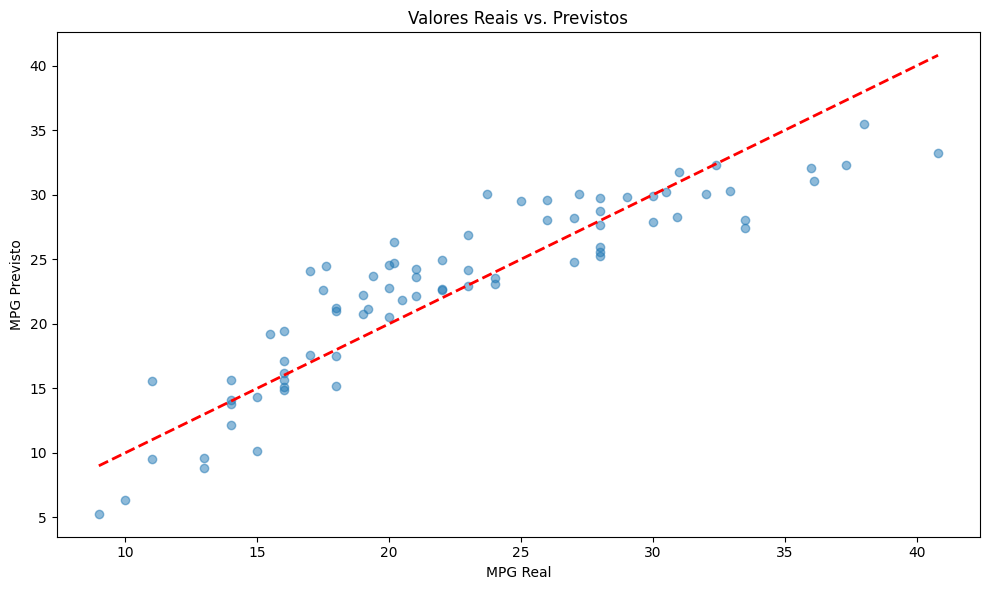

In [36]:
# 7. Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('MPG Real')
plt.ylabel('MPG Previsto')
plt.title('Valores Reais vs. Previstos')
plt.tight_layout()
plt.show()



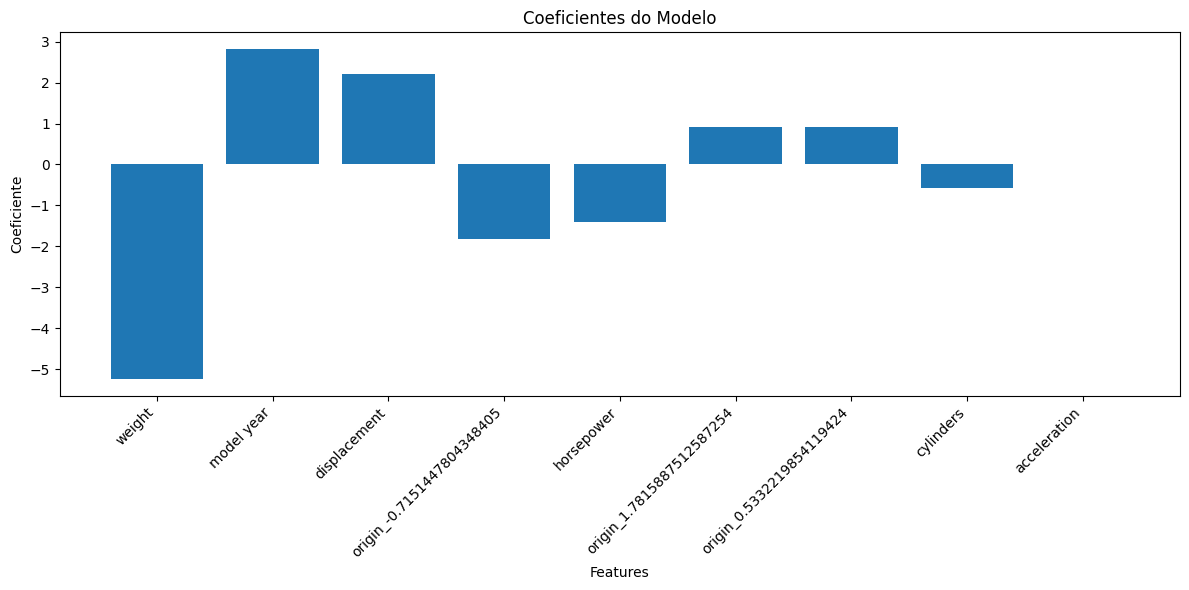


Coeficientes do modelo:
                      Feature  Coefficient
3                      weight    -5.245402
5                  model year     2.823943
1                displacement     2.220411
6  origin_-0.7151447804348405    -1.816038
2                  horsepower    -1.395983
8   origin_1.7815887512587254     0.909372
7   origin_0.5332219854119424     0.906666
0                   cylinders    -0.568093
4                acceleration     0.015038


In [37]:
# 8. Analisar coeficientes
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Coeficientes do Modelo')
plt.xlabel('Features')
plt.ylabel('Coeficiente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nCoeficientes do modelo:")
print(coef_df)